## Laboratorio 3: Modelo lineal Bayesiano

### Manuel Felipe Pineda

- Consulte para que sirven los comandos randn, normpdf, mvnrnd, y mvnpdf de MatLab.

    R: 
    
    *randn* retorna un escalar tomado de una distribucion normal
    
    *normpdf* calcula la funcion de densidad de probabilidad para un X dado
    
    *mvnrnd* es la version multivariada de randn
    
    *mvnpdf* es la version multivariada de normpdf

- Con base en la funcion de MatLab provista para la solucion del Laboratorio 2 (modelo lineal para minimos cuadrados), genere su funcion de modelo lineal utilizando maxima verosimilitud como funcion de costo con pdf Gaussiana.

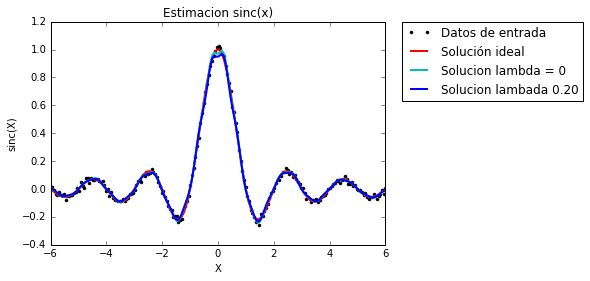

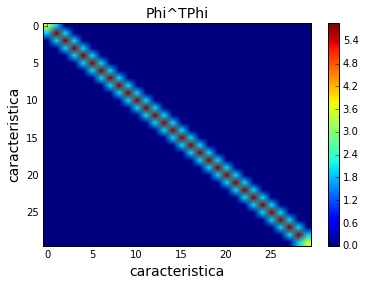

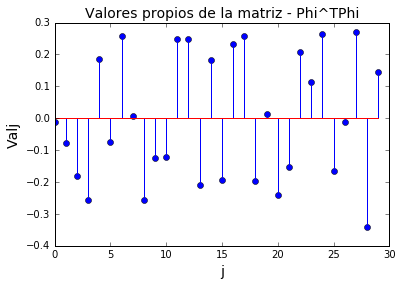

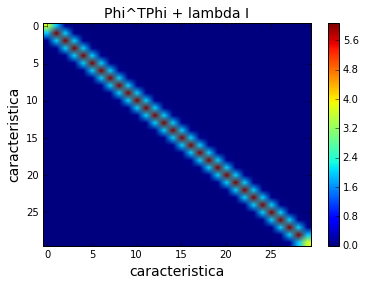

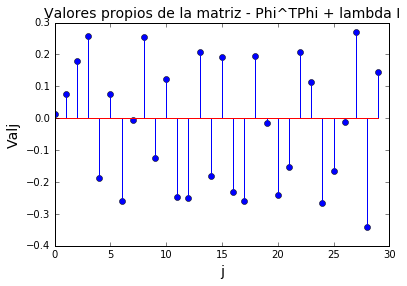

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


def linealMinCua(X, y, l = 0.0):
    C = X.transpose().dot(X)
    s = X.shape[1]
    T = np.linalg.pinv(C + l * np.eye(s, s))
    w =  T.dot(X.transpose()).dot(y)
    ye = X.dot(w)
    return [ye, w, C]


import scipy.spatial as ss

def Agauss(X, mu, sig = None):
    if (sig == None):
        sig = np.median(ss.distance.squareform(ss.distance.cdist(X, mu)))
    D = ss.distance.cdist(X, mu)
    phi = np.exp(-(D ** 2) / (2 * (sig ** 2)))
    return phi

def plotWithPhi(x, y, X, Y, phi, yn):
    def lcurva(phi, Y):
        # TODO: implement l-curve
        return [0.2, 1]

    [ye0, w, C0] = linealMinCua(phi, yn)
    [la, M] = lcurva(phi, Y)
    ye = linealMinCua(phi, yn, la)[0]

    plt.plot(x, yn, 'k.', label = 'Datos de entrada')
    plt.plot(x, y, 'r', linewidth = 2, label = 'Solución ideal')
    plt.plot(x, ye0[:,0], 'c', linewidth = 2, label = 'Solucion lambda = 0')
    plt.plot(x, ye, 'b', linewidth = 2, label = 'Solucion lambada %.2f' % la)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Estimacion sinc(x)')
    plt.xlabel('X')
    plt.ylabel('sinc(X)')
    plt.show()


    plt.imshow(C0, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi', fontsize = 14)
    plt.show()

    w, Val0 = np.linalg.eig(C0)
    plt.stem(np.diag(Val0))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi', fontsize = 14)
    plt.show()

    CReg = C0 + la * np.eye(len(C0))
    w, Val1 = np.linalg.eig(CReg)

    plt.imshow(CReg, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi + lambda I', fontsize = 14)
    plt.show()

    plt.stem(np.diag(Val1))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi + lambda I', fontsize = 14)
    plt.show()
    
def plotSincApprox(a, b, c, LF): # Plots sinc approximation using LF latent functions
    # Gen data
    x = np.linspace(a, b, c)
    X = np.array([x]).T
    y = np.sinc(x)
    Y = np.array([y]).T
    varn = 0.015;
    noise = np.random.normal(0, varn, size=len(y))
    noise = np.array([noise]).T
    yn = Y + noise
    
    # Gen parameters
    sig = 0.2
    mu = np.linspace(a, b, LF)
    mu = np.array([mu]).T
    phi = Agauss(X, mu, sig)
    
    plotWithPhi(x, y, X, Y, phi, yn)

    
plotSincApprox(-6, 6, 200, 30)

- Obtenga la solucion de maxima verosimilitud para la funcion sinc(x) del Laboratorio 2 asumiendo dos condiciones diferentes de ruido (diferentes varianzas para el ruido blanco Gaussiano) y grafique la verosimilitud del modelo lineal asumiendo una distribucion Gaussiana (Asuma la funcion de representacion no lineal de su preferencia: polinomial, Guassiana, sigmoide).

- Obtenga la solucion de MAP para la funcion sinc(x) del Laboratorio 2 para dos condiciones diferentes de ruido y grafique la distribucion predictiva del modelo lineal asumiendo una distribucion Gaussiana (Asuma la funcion de representacion no lineal de su preferencia: polinomial, Guassiana, sigmoide). Recuerde que para MAP debe asumir o estimar los valores de $\alpha$ y $\beta$

- Realice la aproximacion de alguna variable de interes de una base de datos del repositorio Kaggle. Utilice un modelo lineal regularizado por minimos cuadrados, maxima verosimilitud y MAP.